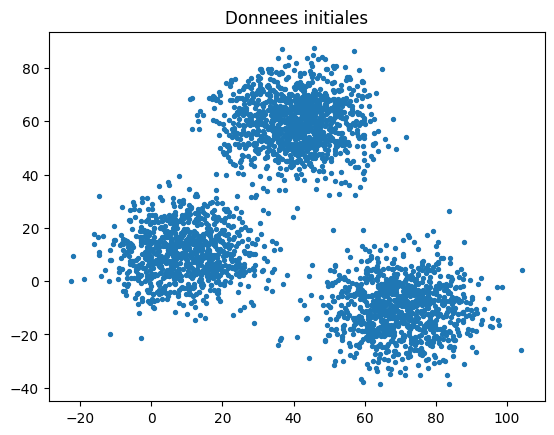

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import time
from sklearn.cluster import AgglomerativeClustering

# Parser un fichier de donnees au format arff
# data est un tableau d’exemples avec pour chacun
# la liste des valeurs des features
#
# Dans les jeux de donnees consideres :
# il y a 2 features (dimension 2)
# Ex : [[-0.499261 , -0.0612356],
# [-1.51369 , 0.265446],
# [-1.60321 , 0.362039], .....
# ]
#
# Note : chaque exemple du jeu de donnees contient aussi un
# numero de cluster. On retire cette information
path = "./artificial/"

databrut = arff.loadarff(open(path+"xclara.arff", "r"))
# print(databrut)
datanp = [[x[0],x[1]] for x in databrut[0]]
# print(datanp)

# Affichage en 2D
# Extraire chaque valeur de features pour en faire une liste
# Ex pour f0 = [-0.499261 , -1.51369 , -1.60321 , ...]
# Ex pour f1 = [-0.0612356 , 0.265446 , 0.362039 , ...]

# f0 tous les éléments de la première colonne de datanp
# f1 tous les éléments de la deuxième colonne de datanp
f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]

plt.scatter(f0 , f1 , s=8)
plt.title("Donnees initiales")
plt.show()

## 3. Clustering agglomératif

### 3.1 Pour démarrer

Le code ci-dessous permet d’afficher un dendrogramme (il y a d’autres possibilités ...) avec la méthode d’agglomération de clusters single.

Dendrogramme 'single' donnees initiales


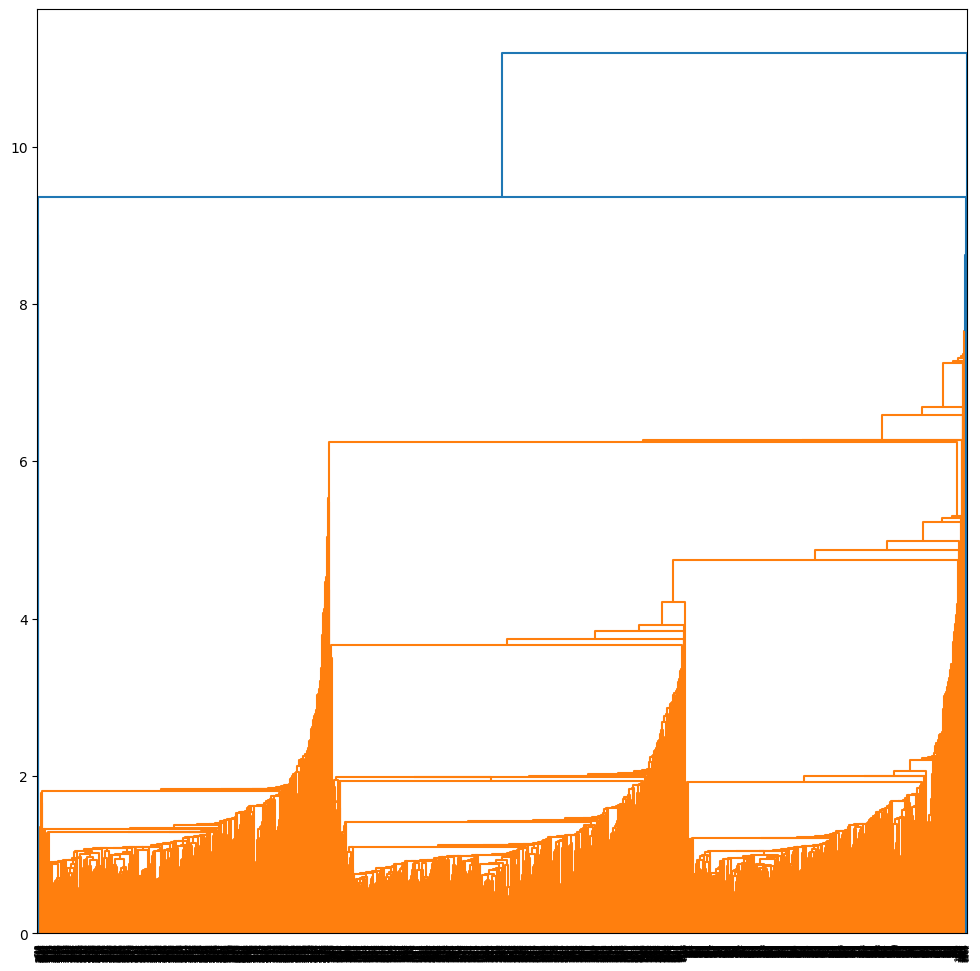

In [55]:
import scipy.cluster.hierarchy as shc

databrut = arff.loadarff(open(path+"xclara.arff", "r"))

datanp = [[x[0],x[1]] for x in databrut[0]]

# f0 tous les éléments de la première colonne de datanp
# f1 tous les éléments de la deuxième colonne de datanp
f0 = [x[0] for x in datanp]
f1 = [x[1] for x in datanp]

# Donnees dans datanp
print ("Dendrogramme 'single' donnees initiales")
linked_mat = shc.linkage ( datanp , 'single')
plt.figure ( figsize =( 12 , 12 ) )
shc.dendrogram ( linked_mat ,
    orientation ='top',
    distance_sort ='descending',
    show_leaf_counts = False )
plt.show ()

Le code suivant permet de déterminer un clustering hiérarchique en utilisant soit une limite sur le seuil de distance soit un nombre de clusters

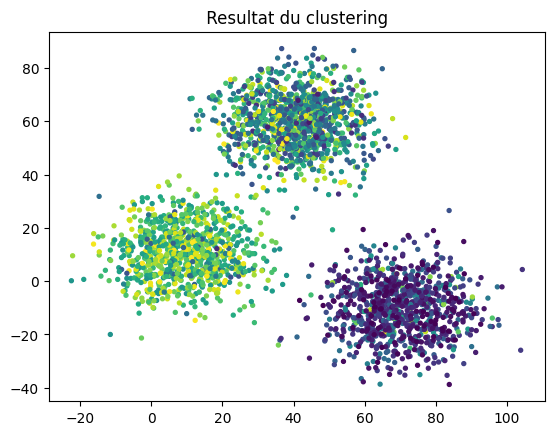

nb clusters = 3000 , nb feuilles =  3000  runtime =  53.7 ms


In [56]:
from sklearn import metrics
from sklearn import cluster

# set distance_threshold (0 ensures we compute the full tree )
tps1 = time.time ()
model = cluster.AgglomerativeClustering (distance_threshold=0, linkage ='single', n_clusters = None )
model = model.fit (datanp)
tps2 = time.time ()
labels = model.labels_
k = model.n_clusters_
leaves = model.n_leaves_

# Affichage clustering
plt.scatter (f0,f1 , c=labels , s=8 )
plt.title (" Resultat du clustering ")
plt.show ()
print ("nb clusters =", k ,", nb feuilles = ", leaves , " runtime = ", round (( tps2 - tps1 )*1000 , 2) ,"ms")

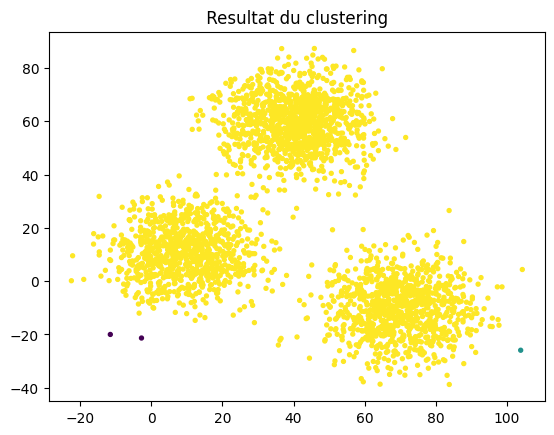

nb clusters = 3 , nb feuilles =  3000  runtime =  50.85 ms


In [57]:

# set the number of clusters
k=3
tps1 = time.time ()
model = cluster.AgglomerativeClustering (linkage ='single', n_clusters =k)
model = model.fit (datanp)
tps2 = time.time ()
labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_


# Affichage clustering
plt.scatter (f0,f1 , c=labels , s=8 )
plt.title (" Resultat du clustering ")
plt.show ()
print ("nb clusters =", kres ,", nb feuilles = ", leaves , " runtime = ", round (( tps2 - tps1 )*1000 , 2) ,"ms")

##  Intérêts de la méthode

Choisissez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode de clustering aggomératif devrait identifier correctement les clusters.

Appliquez itérativement la méthode de clustering agglomératif en faisant varier le seuil de distance afin de déterminer une bonne solution de clustering à l'aide des métriques d'évaluation

Considérez différentes manières de combiner des clusters (single, average, complete, ward linkage), uniquement pour la distance euclidienne. Par défaut l'option connectivity est laissée à none.

Mesurez le temps de calcul

Arrivez-vous à retrouver le résultat attendu à l'aide de ces critères d'évaluation ?


 ------------------
twenty.arff

 ---> seuil_distance =  1
Dendrogramme 'single' donnees initiales


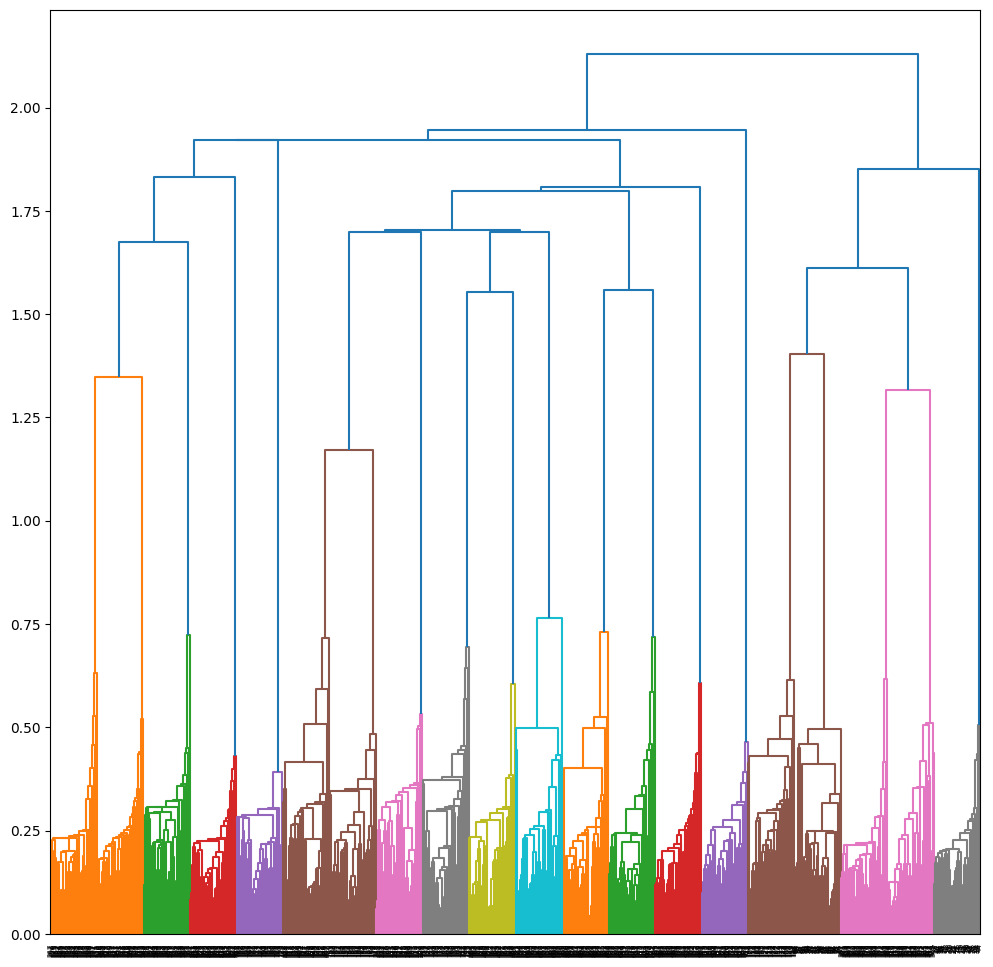

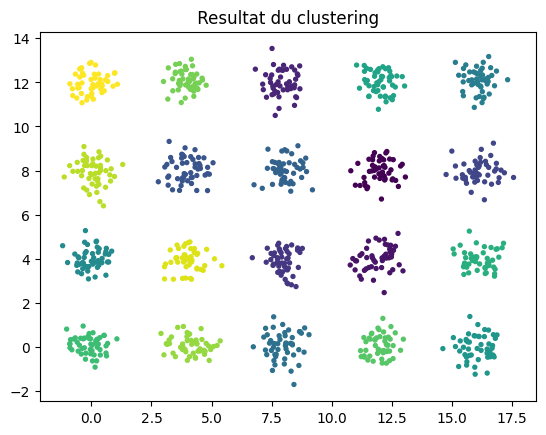

nb clusters = 20 , nb feuilles =  1000  runtime =  7.09 ms

 ---> seuil_distance =  10
Dendrogramme 'single' donnees initiales


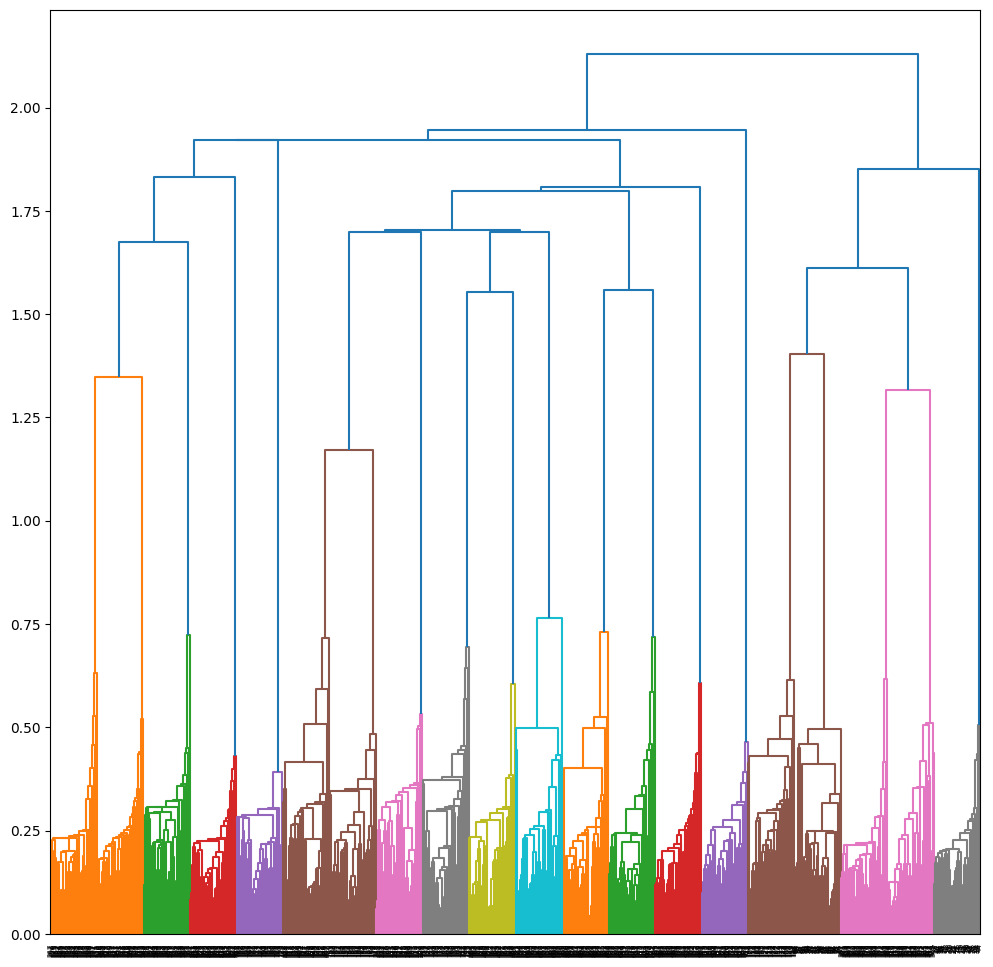

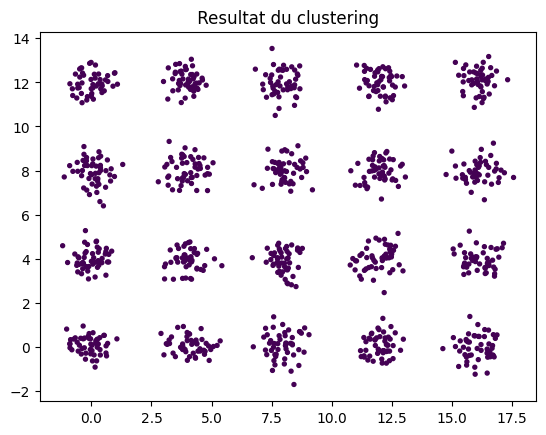

nb clusters = 1 , nb feuilles =  1000  runtime =  7.72 ms

 ---> seuil_distance =  100
Dendrogramme 'single' donnees initiales


In [58]:
import scipy.cluster.hierarchy as shc

dic = {"twenty.arff": [20, [1,10,100]], "spiral.arff": [2, [1,10,100]]}

seuil_distance_list = [1,10,100,1000]

for key in dic:
    print("\n ------------------")
    print(key)
    databrut = arff.loadarff(open(path+key, "r"))

    datanp = [[x[0],x[1]] for x in databrut[0]]

    # f0 tous les éléments de la première colonne de datanp
    # f1 tous les éléments de la deuxième colonne de datanp
    f0 = [x[0] for x in datanp]
    f1 = [x[1] for x in datanp]

    for seuil_distance in dic[key][1]:
        print("\n ---> seuil_distance = ", seuil_distance)
        # Donnees dans datanp
        print ("Dendrogramme 'single' donnees initiales")
        linked_mat = shc.linkage ( datanp , 'single')
        plt.figure ( figsize =( 12 , 12 ) )
        shc.dendrogram ( linked_mat ,
        orientation ='top',
        distance_sort ='descending',
        show_leaf_counts = False )
        plt.show ()


        # set the number of clusters
        k=dic[key][0]
        tps1 = time.time ()
        model = cluster.AgglomerativeClustering (distance_threshold=seuil_distance, linkage ='single', n_clusters=None)
        model = model.fit (datanp)
        tps2 = time.time ()
        labels = model.labels_
        kres = model.n_clusters_
        leaves = model.n_leaves_


        # Affichage clustering
        plt.scatter (f0,f1 , c=labels , s=8 )
        plt.title (" Resultat du clustering ")
        plt.show ()
        print ("nb clusters =", kres ,", nb feuilles = ", leaves , " runtime = ", round (( tps2 - tps1 )*1000 , 2) ,"ms")

In [ ]:
#Considérez différentes manières de combiner des clusters (single, average, complete, ward linkage), uniquement pour la distance euclidienne. Par défaut l'option connectivity est laissée à none.

import scipy.cluster.hierarchy as shc

dic = {"twenty.arff": [20, ["single", "average", "complete", "ward"]], "spiral.arff": [2,["single", "average", "complete", "ward"]]}

for key in dic:
    print("\n ------------------")
    print(key)
    databrut = arff.loadarff(open(path+key, "r"))

    datanp = [[x[0],x[1]] for x in databrut[0]]

    # f0 tous les éléments de la première colonne de datanp
    # f1 tous les éléments de la deuxième colonne de datanp
    f0 = [x[0] for x in datanp]
    f1 = [x[1] for x in datanp]

    for cluster_way in dic[key][1]:
        print("\n ---> Cluster manière de combiner = ", cluster_way)
        # Donnees dans datanp
        print ("Dendrogramme 'single' donnees initiales")
        linked_mat = shc.linkage ( datanp , 'single')
        plt.figure ( figsize =( 12 , 12 ) )
        shc.dendrogram ( linked_mat ,
        orientation ='top',
        distance_sort ='descending',
        show_leaf_counts = False )
        plt.show ()


        # set the number of clusters
        k=dic[key][0]
        tps1 = time.time ()
        model = cluster.AgglomerativeClustering (linkage =cluster_way, n_clusters=None)
        model = model.fit (datanp)
        tps2 = time.time ()
        labels = model.labels_
        kres = model.n_clusters_
        leaves = model.n_leaves_


        # Affichage clustering
        plt.scatter (f0, f1, c=labels , s=8 )
        plt.title (" Resultat du clustering ")
        plt.show ()
        print ("nb clusters =", kres ,", nb feuilles = ", leaves , " runtime = ", round (( tps2 - tps1 )*1000 , 2) ,"ms")
